In [1]:
import sys
print("Python:{}".format(sys.version))
import scipy
print("Scipy:{}".format(scipy.__version__))
import numpy
print("Numpy:{}".format(numpy.__version__))
import matplotlib
print("Matplotlib:{}".format(matplotlib.__version__))
import pandas
print("Pandas:{}".format(pandas.__version__))
import sklearn
print("Sklearn:{}".format(sklearn.__version__))

Python:3.7.4 (default, Aug  9 2019, 18:22:51) [MSC v.1915 32 bit (Intel)]
Scipy:1.3.1
Numpy:1.16.5
Matplotlib:3.1.1
Pandas:0.25.1
Sklearn:0.21.1


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mynumpy=numpy.array([[1,2,3],[4,5,6]])
rownames=['a','b']
colnames=['one','two','three']
mydataframe=pandas.DataFrame(mynumpy, index=rownames,columns=colnames)
print(mydataframe)

   one  two  three
a    1    2      3
b    4    5      6


In [4]:
from pandas import read_csv
url="https://goo.gl/bDdBiA"
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=read_csv(url,names=names)
print(data)
print(data.shape)

     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]
(768, 9)


In [5]:
description=data.describe()
print(description)

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0898C850>,
      dtype=object)

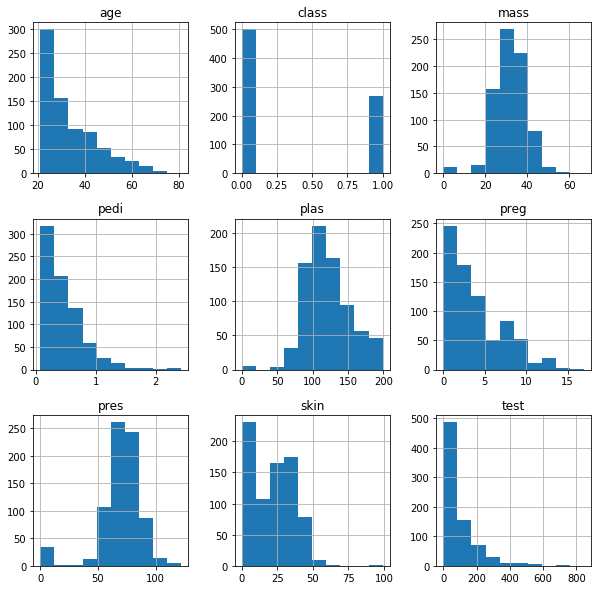

In [6]:
a=pandas.DataFrame(data)
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
a.hist(ax = ax)

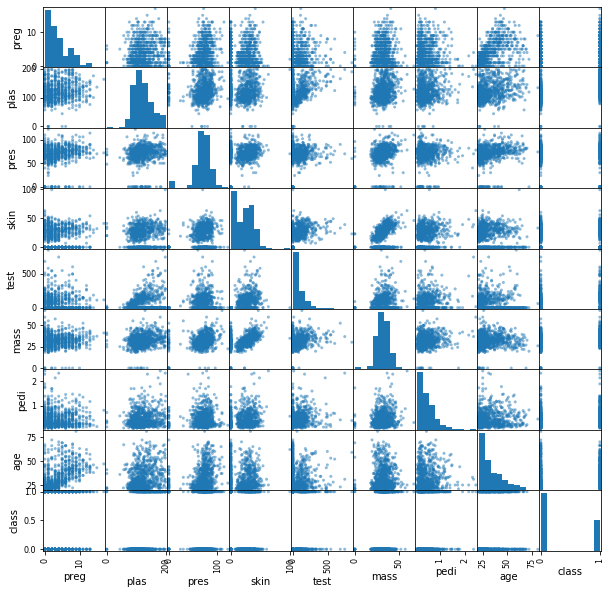

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(10, 10))
plt.show()

In [8]:
#we did feature scaling
dataframe = read_csv(url, names=names)
from sklearn.preprocessing import StandardScaler
array=dataframe.values
X=array[:,0:8]
Y=array[:,8]
scaler = StandardScaler().fit(X)
rescaledX=scaler.transform(X)
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
kfold=KFold(n_splits=10,random_state=7)
model = LogisticRegression(solver='liblinear')
results=cross_val_score(model,X,Y,cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.951% (4.841%)


In [16]:
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.493 (0.047)


In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
url = 'https://goo.gl/bDdBiA'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
models=[]
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis())) 
names=[]
results=[]
scoring='accuracy'            
for name, model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_results) 
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean()*100.0, cv_results.std()*100.0))
         

LR: 76.951470 (4.841052)
LDA: 77.346206 (5.159180)


In [62]:
#we will now tune the parameters using grid search
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
url = 'https://goo.gl/bDdBiA'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)


0.27961755931297233
1.0


In [65]:
from sklearn.ensemble import RandomForestClassifier
num_trees=100
max_features=3
kfold=KFold(n_splits=10,random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean()*100.0)

76.42002734107997


In [76]:
from sklearn.model_selection import train_test_split
import pickle
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

result = loaded_model.score(X_test, Y_test)
print(result*100.0)

77.16535433070865
